In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import calendar as cld
import matplotlib.pyplot as plt
#import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
#plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import glob
import os
import re



In [22]:
WY0=1999
print(WY0)
WY1=str((WY0+1))[-2:]
print(WY1)

domain='HK'
lat_min, lat_max = 35, 43
lon_min, lon_max = 66, 79


1999
00


In [8]:

#path = '/bettik/PROJECTS/pr-regional-climate/inputs/HMA_SR_D/'+str(WY0)+'/'
path= f'/bettik/PROJECTS/pr-regional-climate/santolam/HMA_SR_daily_7km_{domain}/'+str(WY0)+'/'

list_files =glob.glob((path+f'HMA_SR_D_v01_N*_0E*_0_agg_16_WY{str(WY0)}_{str(WY1)}_SD_POST_MASKED_coarsen15x15.nc'))

fileNames = [os.path.basename(f) for f in list_files]
#    for ds_name in ['SD_POST']:
#        print(ds_name)
#        list_files = [f for f in os.listdir(path) if ds_name in f]

#print(list_files[0:10])
print(fileNames[0:10])
#print(len(list_files))

['HMA_SR_D_v01_N43_0E75_0_agg_16_WY1999_00_SD_POST_MASKED_coarsen15x15.nc', 'HMA_SR_D_v01_N40_0E68_0_agg_16_WY1999_00_SD_POST_MASKED_coarsen15x15.nc', 'HMA_SR_D_v01_N42_0E79_0_agg_16_WY1999_00_SD_POST_MASKED_coarsen15x15.nc', 'HMA_SR_D_v01_N37_0E70_0_agg_16_WY1999_00_SD_POST_MASKED_coarsen15x15.nc', 'HMA_SR_D_v01_N41_0E70_0_agg_16_WY1999_00_SD_POST_MASKED_coarsen15x15.nc', 'HMA_SR_D_v01_N38_0E78_0_agg_16_WY1999_00_SD_POST_MASKED_coarsen15x15.nc', 'HMA_SR_D_v01_N35_0E70_0_agg_16_WY1999_00_SD_POST_MASKED_coarsen15x15.nc', 'HMA_SR_D_v01_N40_0E66_0_agg_16_WY1999_00_SD_POST_MASKED_coarsen15x15.nc', 'HMA_SR_D_v01_N38_0E72_0_agg_16_WY1999_00_SD_POST_MASKED_coarsen15x15.nc', 'HMA_SR_D_v01_N38_0E68_0_agg_16_WY1999_00_SD_POST_MASKED_coarsen15x15.nc']


In [19]:
#for ds_name in fileNames:
 #       print(ds_name)
ds_raw = xr.open_mfdataset(path+f'HMA_SR_D_v01_N*_0E*_0_agg_16_WY{str(WY0)}_{str(WY1)}_SD_POST_MASKED_coarsen15x15.nc', parallel=True)

In [20]:
ds_raw

<xarray.Dataset>
Dimensions:    (Latitude: 135, Longitude: 210, Day: 366)
Coordinates:
  * Latitude   (Latitude) float64 35.03 35.1 35.17 35.23 ... 43.83 43.9 43.97
  * Longitude  (Longitude) float64 66.03 66.1 66.17 66.23 ... 79.83 79.9 79.97
Dimensions without coordinates: Day
Data variables:
    SD_Post    (Day, Longitude, Latitude) float32 dask.array<chunksize=(366, 15, 15), meta=np.ndarray>

In [23]:
ds=ds_raw['SD_Post']
ds = ds.assign_coords(Day=pd.date_range(start=str(WY0)+'-10-01', periods=ds.Day.size, freq='D'))
ds = ds.rename({'Longitude': 'lon', 'Latitude': 'lat', 'Day': 'time'}).transpose("time", "lat", "lon")
ds.to_netcdf(path+f'HMA_SR_D_v01_WY{str(WY0)}_{str(WY1)}_{domain}_lat{lat_min}N{lat_max}N_lon{lon_min}E{lon_max}E_SD_POST_MASKED_coarsen15x15.nc')
        
        #########
        ### + check size of SWE_SCA otherwise open and save back

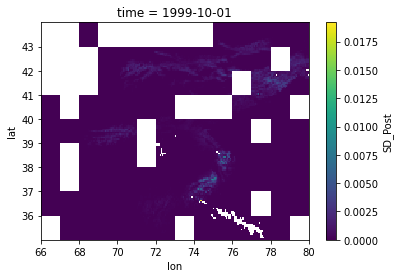

In [24]:
ds[0,:,:].plot()

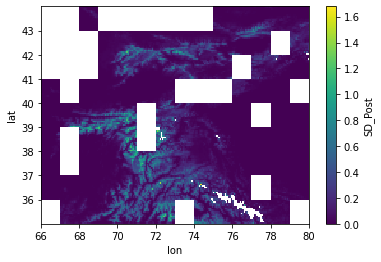

In [25]:
ds.mean('time').plot()